# Analysing frequency of purchase

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading the dataset

In [2]:
df = pd.read_excel("Frequency of Purchase Analysis Data Question (2).xlsx")
df.head()

,Outlet ID,Brand Name,Sales Value,DATE
0,Outlet 1,Brand 1,395.6906,2018-04-10
1,Outlet 1,Brand 1,395.6906,2018-04-24
2,Outlet 1,Brand 2,724.9328,2018-04-10
3,Outlet 1,Brand 3,150.0466,2018-04-10
4,Outlet 1,Brand 3,300.0932,2018-04-24


## Info about data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25473 entries, 0 to 25472
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Outlet ID    25473 non-null  object        
 1   Brand Name   25473 non-null  object        
 2   Sales Value  25473 non-null  float64       
 3   DATE         25473 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 796.2+ KB


## Finding the count of outlets

In [4]:
df['Outlet ID'].value_counts()

Outlet 7321    9
Outlet 6009    9
Outlet 3445    9
Outlet 5835    9
Outlet 714     9
              ..
Outlet 865     1
Outlet 798     1
Outlet 792     1
Outlet 1276    1
Outlet 1104    1
Name: Outlet ID, Length: 5811, dtype: int64

## Finding the average purchase per month/ frequency of purchase

In [5]:
# finding the count of outlets
l = df['Outlet ID'].value_counts().values
l

array([9, 9, 9, ..., 1, 1, 1], dtype=int64)

In [6]:
# number of unique oulets
len(l)

5811

In [7]:
# total number of purchase
l.sum()

25473

#### We can get the average purchase per month/ frequency of purchase
#### formula = number of orders/ number of unique oulets

In [8]:
25473/5811

4.383582860092927

#### Each outlet purchases 4 times on an average each month

## Working with outlets

In [9]:
# creating a new dataframe which will contain only the Outlet id and its count
l = df['Outlet ID'].value_counts()
l1 = pd.DataFrame(l)
l1

,Outlet ID
Outlet 7321,9
Outlet 6009,9
Outlet 3445,9
Outlet 5835,9
Outlet 714,9
...,...
Outlet 865,1
Outlet 798,1
Outlet 792,1
Outlet 1276,1


In [16]:
# converting it to excel for ease
l1.to_excel('outlet.xlsx')

In [17]:
# reading that file
df_outlet = pd.read_excel('outlet.xlsx')
df_outlet.head()

,Outlet ID,Frequency
0,Outlet 7321,9
1,Outlet 6009,9
2,Outlet 3445,9
3,Outlet 5835,9
4,Outlet 714,9


### Outlets purchased less than the average purchase

In [18]:
# outlet less than 4
df_outlet[df_outlet['Frequency'] < 4]

,Outlet ID,Frequency
3066,Outlet 1779,3
3067,Outlet 301,3
3068,Outlet 6149,3
3069,Outlet 7249,3
3070,Outlet 2312,3
...,...,...
5806,Outlet 865,1
5807,Outlet 798,1
5808,Outlet 792,1
5809,Outlet 1276,1


### Outlets purchased once

In [19]:
df_outlet[df_outlet.Frequency==1].shape[0]

818

### Outlets purchased 2times

In [20]:
df_outlet[df_outlet.Frequency==2].shape[0]

717

### Outlets purchased 3times

In [21]:
df_outlet[df_outlet.Frequency==3].shape[0]

1210

### Outlets purchased 4times

In [22]:
df_outlet[df_outlet.Frequency==4].shape[0]

744

### Outlets purchased 5times

In [23]:
df_outlet[df_outlet.Frequency==5].shape[0]

489

### Outlets purchased 6times

In [24]:
df_outlet[df_outlet.Frequency==6].shape[0]

468

### Outlets purchased 7times

In [25]:
df_outlet[df_outlet.Frequency==7].shape[0]

344

### Outlets purchased 8times

In [26]:
df_outlet[df_outlet.Frequency==8].shape[0]

235

### Outlets purchased 9times

In [27]:
df_outlet[df_outlet.Frequency==9].shape[0]

786

#### Now I have created a copy of the dataframe so that I can encode the data to make some visualizations

In [28]:
df1 = df.copy()

In [29]:
df1['Outlet No'] = np.nan
df1['Brand No'] = np.nan

In [30]:
df1.head()

,Outlet ID,Brand Name,Sales Value,DATE,Outlet No,Brand No
0,Outlet 1,Brand 1,395.6906,2018-04-10,NaN,NaN
1,Outlet 1,Brand 1,395.6906,2018-04-24,NaN,NaN
2,Outlet 1,Brand 2,724.9328,2018-04-10,NaN,NaN
3,Outlet 1,Brand 3,150.0466,2018-04-10,NaN,NaN
4,Outlet 1,Brand 3,300.0932,2018-04-24,NaN,NaN


In [31]:
def fun():
    for i in range(df1['Outlet ID'].shape[0]):
      val_out = df['Outlet ID'][i].split(" ")[1]
      val_brand= df['Brand Name'][i].split(" ")[1]
      df1['Outlet No'][i] = val_out
      df1['Brand No'][i] = val_brand

In [32]:
fun()

<ipython-input-31-be5e3b32252e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Outlet No'][i] = val_out
<ipython-input-31-be5e3b32252e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Brand No'][i] = val_brand


In [33]:
df1.head()

,Outlet ID,Brand Name,Sales Value,DATE,Outlet No,Brand No
0,Outlet 1,Brand 1,395.6906,2018-04-10,1.0,1.0
1,Outlet 1,Brand 1,395.6906,2018-04-24,1.0,1.0
2,Outlet 1,Brand 2,724.9328,2018-04-10,1.0,2.0
3,Outlet 1,Brand 3,150.0466,2018-04-10,1.0,3.0
4,Outlet 1,Brand 3,300.0932,2018-04-24,1.0,3.0


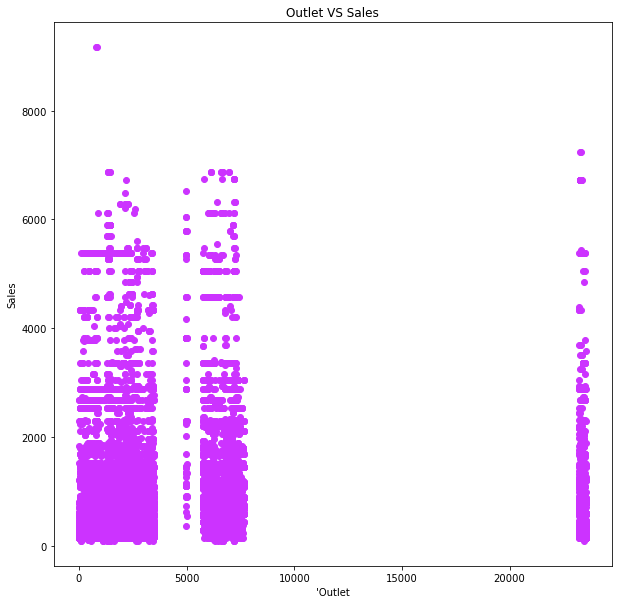

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(df1['Outlet No'], df1['Sales Value'], c='#cc33ff')
plt.xlabel("'Outlet")
plt.ylabel("Sales")
plt.title("Outlet VS Sales")
plt.show()

### Grouping data based on Outlets

In [36]:
grp = df1.groupby('Outlet No')

In [37]:
grp.sum().head(10)

,Sales Value,Brand No
Outlet No,,
1.0,2139.5366,14.0
2.0,2277.9236,7.0
3.0,1843.1224,18.0
4.0,975.4444,7.0
5.0,1381.1532,18.0
6.0,2302.1484,3.0
7.0,766.6470,8.0
8.0,1250.9166,13.0
9.0,1499.6170,13.0
